![](img/banner.png)
%%HTML
<script src="require.js"></script>


# Hidden Markov Models

**Mahmood Amintoosi, Spring 2025**

Computer Science Dept, Ferdowsi University of Mashhad

In [1]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/machine-learning'):
    !git clone -q https://github.com/fum-cs/machine-learning.git /content/machine-learning
    !pip --quiet install -r /content/machine-learning/requirements_colab.txt
    %cd machine-learning/notebooks

# Global imports and settings
%matplotlib inline
from preamble import *
interactive = False # Set to True for interactive plots
if interactive:
    fig_scale = 0.61
    print_config['font.size'] = 7
    print_config['xtick.labelsize'] = 5
    print_config['ytick.labelsize'] = 5
    plt.rcParams.update(print_config)
else: # For printing
    fig_scale = 0.28
    plt.rcParams.update(print_config)


## Hidden Markov Models (HMMs)

Hidden Markov Models are widely used in various fields, including natural language processing, speech recognition, and bioinformatics. They are probabilistic models that capture sequences of observations (or symbols) generated by an underlying hidden state process. 
A good source for HMM is [Appendix A of Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/A.pdf), by Dan Jurafsky and James H. Martin.

Here are the key components of an HMM:

1. **States**: An HMM consists of a set of hidden states. Each state represents a different situation or condition. For example, in part-of-speech tagging, states could correspond to different parts of speech (e.g., noun, verb, adjective).

2. **Observations (Emissions)**: At each time step, the HMM emits an observation (symbol) based on the current hidden state. These observations can be words, phonemes, or any other relevant symbols.

3. **Transition Probabilities**: HMMs model how the hidden states transition from one to another. Transition probabilities represent the likelihood of moving from one state to another.

4. **Emission Probabilities**: Each hidden state has associated emission probabilities for generating specific observations. These probabilities indicate how likely an observation is given the current state.

The following figure shows an HMM with 4 states which can emit 2 discrete symbols $o_1$ or $o_2$.
$a_{ij}$ is the probability to transition from state $S_i$ to state $S_j$.
$b_j(o_k)$ is the probability to emit symbol $o_k$ in state $S_j$.
In this particular HMM, states can only reach themselves or the adjacent state.

![HMM Model](img/08_HMM_Model.png)


The mathematical notation of HMM parameters are as follows:

1. Model parameters:
   - $\lambda$: The model parameters, which include the state transition probabilities, observation probabilities, and initial state probabilities.

2. States set 
   - The set of all possible states $S=\{s_1,\dots,s_N\}$.

3. Observation set:
   - The set of all possible observations.

4. State transition matrix (Transition Probabilities):
   - $A$: The state transition matrix, where $a_{ij} = P(q_t=s_j | q_{t-1}=s_i)$ represents the probability of transitioning from state $s_i$ to state $s_j$.
   
   Note: In the following we may show state $s_i$, by state $i$; hence $a_{ij}$ could also demonstrated by $P(q_t=j | q_{t-1}=i)$.

5. Observation probabilities (Emission Probabilities):
   - $B$: The observation probability matrix, where $b_j(o_t) = P(o_t | q_t=j)$ represents the probability of observing $o_t$ given that the system is in state $j$.

6. Initial state probabilities:
   - $\pi$: The initial state probabilities, where $\pi_i = P(q_1=i)$ represents the probability of the system starting in state $i$.

7. Observation sequence:
   - $O = o_1 o_2 ... o_T$: The sequence of observations.


hidden Markov models should be characterized by three fundamental problems:
- **Problem 1** (Likelihood): Given an HMM $\lambda = (A,B)$ and an observation sequence $O$, determine the likelihood $P(O|\lambda)$.
- **Problem 2** (Decoding): Given an observation sequence $O$ and an HMM $\lambda = (A,B)$, discover the best hidden state sequence $Q$.
- **Problem 3** (Learning): Given an observation sequence $O$ and the set of states in the HMM, learn the HMM parameters $A$ and $B$.   

# Viterbi Algorithm

The Viterbi algorithm is a dynamic programming algorithm used for finding the most likely sequence of hidden states (also known as the Viterbi path) in a hidden Markov model (HMM) given a sequence of observations (**problem 2**).
The Viterbi algorithm aims to find the most likely sequence of hidden states $Q = q_1 q_2 ... q_T$ that maximizes the probability $P(O,Q|\lambda)$. 

The algorithm uses the following recurrence relation:

$$v_t(j) = \max_{1 \leq j \leq N} v_{t-1}(i) a_{ij} b_i(o_t)$$

where $v_t(j)$ represents the maximum probability of the most likely sequence of states ending in state $i$ at time $t$ and observing the partial sequence $o_1o_2...o_t$.

The Viterbi algorithm can be summarized as follows:

1. Initialization:
   - $v_1(j) = \pi_j b_j(o_1)$, for $1 \leq j \leq N$
   - $bt_1(i) = 0$

2. Recursion:
   - $v_t(j) = \max_{1 \leq i \leq N} v_{t-1}(i) a_{ij} b_j(o_t)$, for $2 \leq t \leq T$ and $1 \leq j \leq N$
   - $bt_t(j) = \arg\max_{1 \leq i \leq N} v_{t-1}(i) a_{ij}b_j(o_t)$, for $1 \leq t \leq T$ and $1 \leq i \leq N$

3. Termination:
   - $P^* = \max_{1 \leq i \leq N} v_T(i)$
   - $q_T^* = \arg\max_{1 \leq i \leq N} v_T(i)$

4. Backtracking:
   - $q_t^* = bt_{t+1}(q_{t+1}^*)$, for $t = T-1, T-2, ..., 1$

The final result is the most likely sequence of hidden states $Q^* = q_1^* q_2^* ... q_T^*$ and the maximum probability $P^*$.


The trellis diagram is a visual representation of the Viterbi algorithm, which is used to find the most likely sequence of hidden states (also known as the Viterbi path) given an observed sequence of emissions in a Hidden Markov Model (HMM).

![HMM](img/08_HMM_Model.png)

The **trellis diagram** depicts the evolution of the HMM over time, with each column representing a time step, and each row representing a possible state of the HMM. The nodes in the diagram represent the states, and the edges represent the transitions between states.

![Trellis Diagram](img/08_HMM_Trellis.png)
Figure: Trellis of the observation sequence $o_1$,$o_2$,$o_2$ for the above HMM. The thick arrows indicate the most probable transitions. As an example, the transition between state $s_1$ at time t=2 and state $s_4$ at time t=3 has probability $\alpha_2(1)a_{14}b_4(o_2)$, where $\alpha_t(i)$ is the probability to be in state $s_i$ at time t.


The trellis diagram is constructed as follows:

1. The first column represents the initial state of the HMM at time $t=1$. The nodes in this column correspond to the possible states of the HMM, and they are labeled with the state names ($s_1, s_2, s_3, s_4$).

2. The subsequent columns represent the HMM at subsequent time steps ($t=2$, $t=3$, etc.). The nodes in these columns also correspond to the possible states of the HMM, and they are connected to the nodes in the previous column by edges that represent the state transitions.

3. The thickness of the edges represents the probability of the transition. The thick edges indicate the most likely transitions, as determined by the Viterbi algorithm.

In the example, the trellis diagram shows the evolution of the HMM for the observed sequence $o_1, o_2, o_2$. The Viterbi algorithm is used to find the most likely sequence of hidden states that could have generated this observed sequence. The thick edges in the diagram represent the Viterbi path, which is the sequence of states that has the highest probability of producing the observed sequence.

The caption of the trellis diagram provides an example of how the transition probability between two states is calculated. Specifically, the transition probability between state S1 at time $t=2$ and state S4 at time $t=3$ is given by the expression $\alpha_2(1)a_{14}b_4(o_2)$, where:

- $\alpha_2(1)$ is the probability of being in state $s_1$ at time $t=2$
- $a_{14}$ is the transition probability from state $s_1$ to state $s_4$
- $b_4(o_2)$ is the probability of observing the symbol $o_2$ in state $s_4$

The trellis diagram is a valuable tool for visualizing the Viterbi algorithm and understanding the most likely sequence of hidden states that could have generated the observed sequence in an HMM.


# Dynamic Programming

Dynamic programming is a powerful technique for solving problems by breaking them down into smaller, overlapping subproblems. It's widely used in various fields, including computer science, optimization, and image processing. One intriguing application of dynamic programming is **seam carving**. Seam carving is used in content-aware image resizing, in which, its algorithm is very similar to Viterbi algorithm.

## Content-Aware Image Resizing
Content-aware image resizing aims to change the width or height of an image while preserving its essential features. Traditional methods like cropping and scaling have limitations, often resulting in loss of important content or visible artifacts. Seam carving offers an elegant solution by identifying and removing low-energy seams from the image.

### What Are Seams?
In the context of seam carving, a **seam** is a connected path of pixels that spans the entire height or width of the image. The goal is to find the lowest-energy seam (i.e., the least interesting part of the image) and remove it. Seam carving ensures that the removed seam doesn't disrupt the overall visual coherence.

### Seam Carving Process
1. **Energy Calculation**: First, we compute the energy of each pixel in the image. Energy represents the importance of a pixel based on its color gradients. Higher energy corresponds to more visually significant regions.

2. **Dynamic Programming**: Seam carving uses dynamic programming to find the optimal seam. For vertical resizing (reducing width), we find the seam with the minimum cumulative energy from top to bottom. The seam moves left or right by at most one pixel in each row.

3. **Seam Removal**: Once we identify the lowest-energy seam, we remove it by shifting the remaining pixels to close the gap. This process is repeated until the desired image width is achieved.

### Example
Consider the [following image](https://www.ulfdittmer.com/imagej/seam-carving.html); Seam carving identifies the lowest-energy seam, which typically runs through less interesting areas. By removing this seam, we resize the image without sacrificing essential details.

![Seam-Carving Image](img/seam-carving.jpg)




## Dynamic Programming 

Dynamic programming plays a crucial role in both seam carving and the Viterbi algorithm. While seam carving focuses on image resizing, the Viterbi algorithm is widely used for decoding hidden Markov models (HMMs). Let's explore their similarities and differences.

## Seam Carving Algorithm 

1. **Energy Calculation**:
   - Compute the energy of each pixel in the image.
   - Define an energy matrix where each entry represents the cumulative energy from the top-left corner to that pixel.

2. **Dynamic Programming Table**:
   - Create a dynamic programming table (similar to the Viterbi trellis).
   - Initialize the first row of the table with the energy values from the energy matrix.

3. **Optimal Seam Identification**:
   - For each subsequent row, compute the cumulative energy by considering the neighboring pixels (left, above-left, and above-right).
   - Update the dynamic programming table with the minimum cumulative energy path.
   - The optimal seam corresponds to the path with the lowest cumulative energy in the last row.

4. **Seam Removal**:
   - Remove the pixels along the identified seam.
   - Shift the remaining pixels to close the gap.
   - Repeat until the desired image width is achieved.


- Seam carving and the Viterbi algorithm exemplify the versatility of dynamic programming. Whether we're resizing images or decoding hidden states, dynamic programming provides elegant solutions.
- Seam carving minimizes energy, while the Viterbi algorithm maximizes probabilities.
- Both algorithms find an optimal path based on dynamic programming principles.

### Seam-carving implementation

My first implementation of seam-carving was in MATLAB, then by Python. In the following, my new code which is a combination of my previous code and [Karthik Karanth](https://karthikkaranth.me/blog/implementing-seam-carving-with-python/)'s code is provided.

In [2]:
"""
This is a combination of Karthik Karanth and my implementation for seam carving 
"""


def calc_energy(img):
    Ix, Iy = np.gradient(rgb2gray(img))
    energy_map = np.abs(Ix) + np.abs(Iy)
    return energy_map


def crop_c(img, num_seams):
    r, c, _ = img.shape
    for i in range(min([num_seams, c])):
        img = carve_column(img)
    return img


def crop_r(img, num_seams):
    img = np.rot90(img, 1, (0, 1))
    img = crop_c(img, num_seams)
    img = np.rot90(img, 3, (0, 1))
    return img


def carve_column(img):
    r, c, _ = img.shape
    M, backtrack = minimum_seam(img)
    mask = np.ones((r, c), dtype=bool)

    j = np.argmin(M[-1])
    for i in reversed(range(r)):
        mask[i, j] = False
        j = backtrack[i, j]

    mask = np.stack([mask] * 3, axis=2)
    img = img[mask].reshape((r, c - 1, 3))
    return img


def find_optimal_seam(M, backtrack):
    r, c = M.shape
    # Find the column index with the minimum energy in the last row
    j = np.argmin(M[-1])

    # Initialize an empty list to store the seam indices
    seam = []

    # Backtrack from the last row to the first row
    for i in reversed(range(r)):
        seam.append((i, j))
        j = backtrack[i, j]

    # Reverse the seam to get the correct order
    seam.reverse()
    return seam


# usage:
# seam_indices = find_optimal_seam(M, backtrack)
# Now seam_indices contains the optimal path as a list of (i, j) indices

In [3]:
def minimum_seam(img):
    r, c, _ = img.shape
    energy_map = calc_energy(img)

    M = energy_map.copy()
    backtrack = np.zeros_like(M, dtype=np.int32)

    for i in range(1, r):
        for j in range(0, c):
            left_most_col = max(0, j - 1)
            idx = np.argmin(M[i - 1, left_most_col : j + 2])
            backtrack[i, j] = left_most_col + idx
            min_energy = M[i - 1, left_most_col + idx]

            M[i, j] += min_energy

    return M, backtrack

Usage of the above functions for vertical or horizontal seam-carving

In [4]:
# which_axis = "c"
# num_seams = 100
# in_filename = "img/two-butterfly.jpg"
# img = imread(in_filename)
# if which_axis == "r":
#     out = crop_r(img, num_seams)
# elif which_axis == "c":
#     out = crop_c(img, num_seams)

# plt.figure(figsize=(10, 5))
# plt.subplot(1, 3, 1)
# plt.axis("off")
# plt.imshow(img)

# plt.subplot(1, 3, 2)
# plt.axis("off")
# plt.imshow(calc_energy(img))

# plt.subplot(1, 3, 3)
# plt.axis("off")
# plt.imshow(out.astype(np.int16))

Make the image smaller in length: 540x540 -> 400x540

In [7]:
in_filename = "img/MistakeFreeTomorrow.jpg"
img = imread(in_filename)

out = crop_r(img, 140)

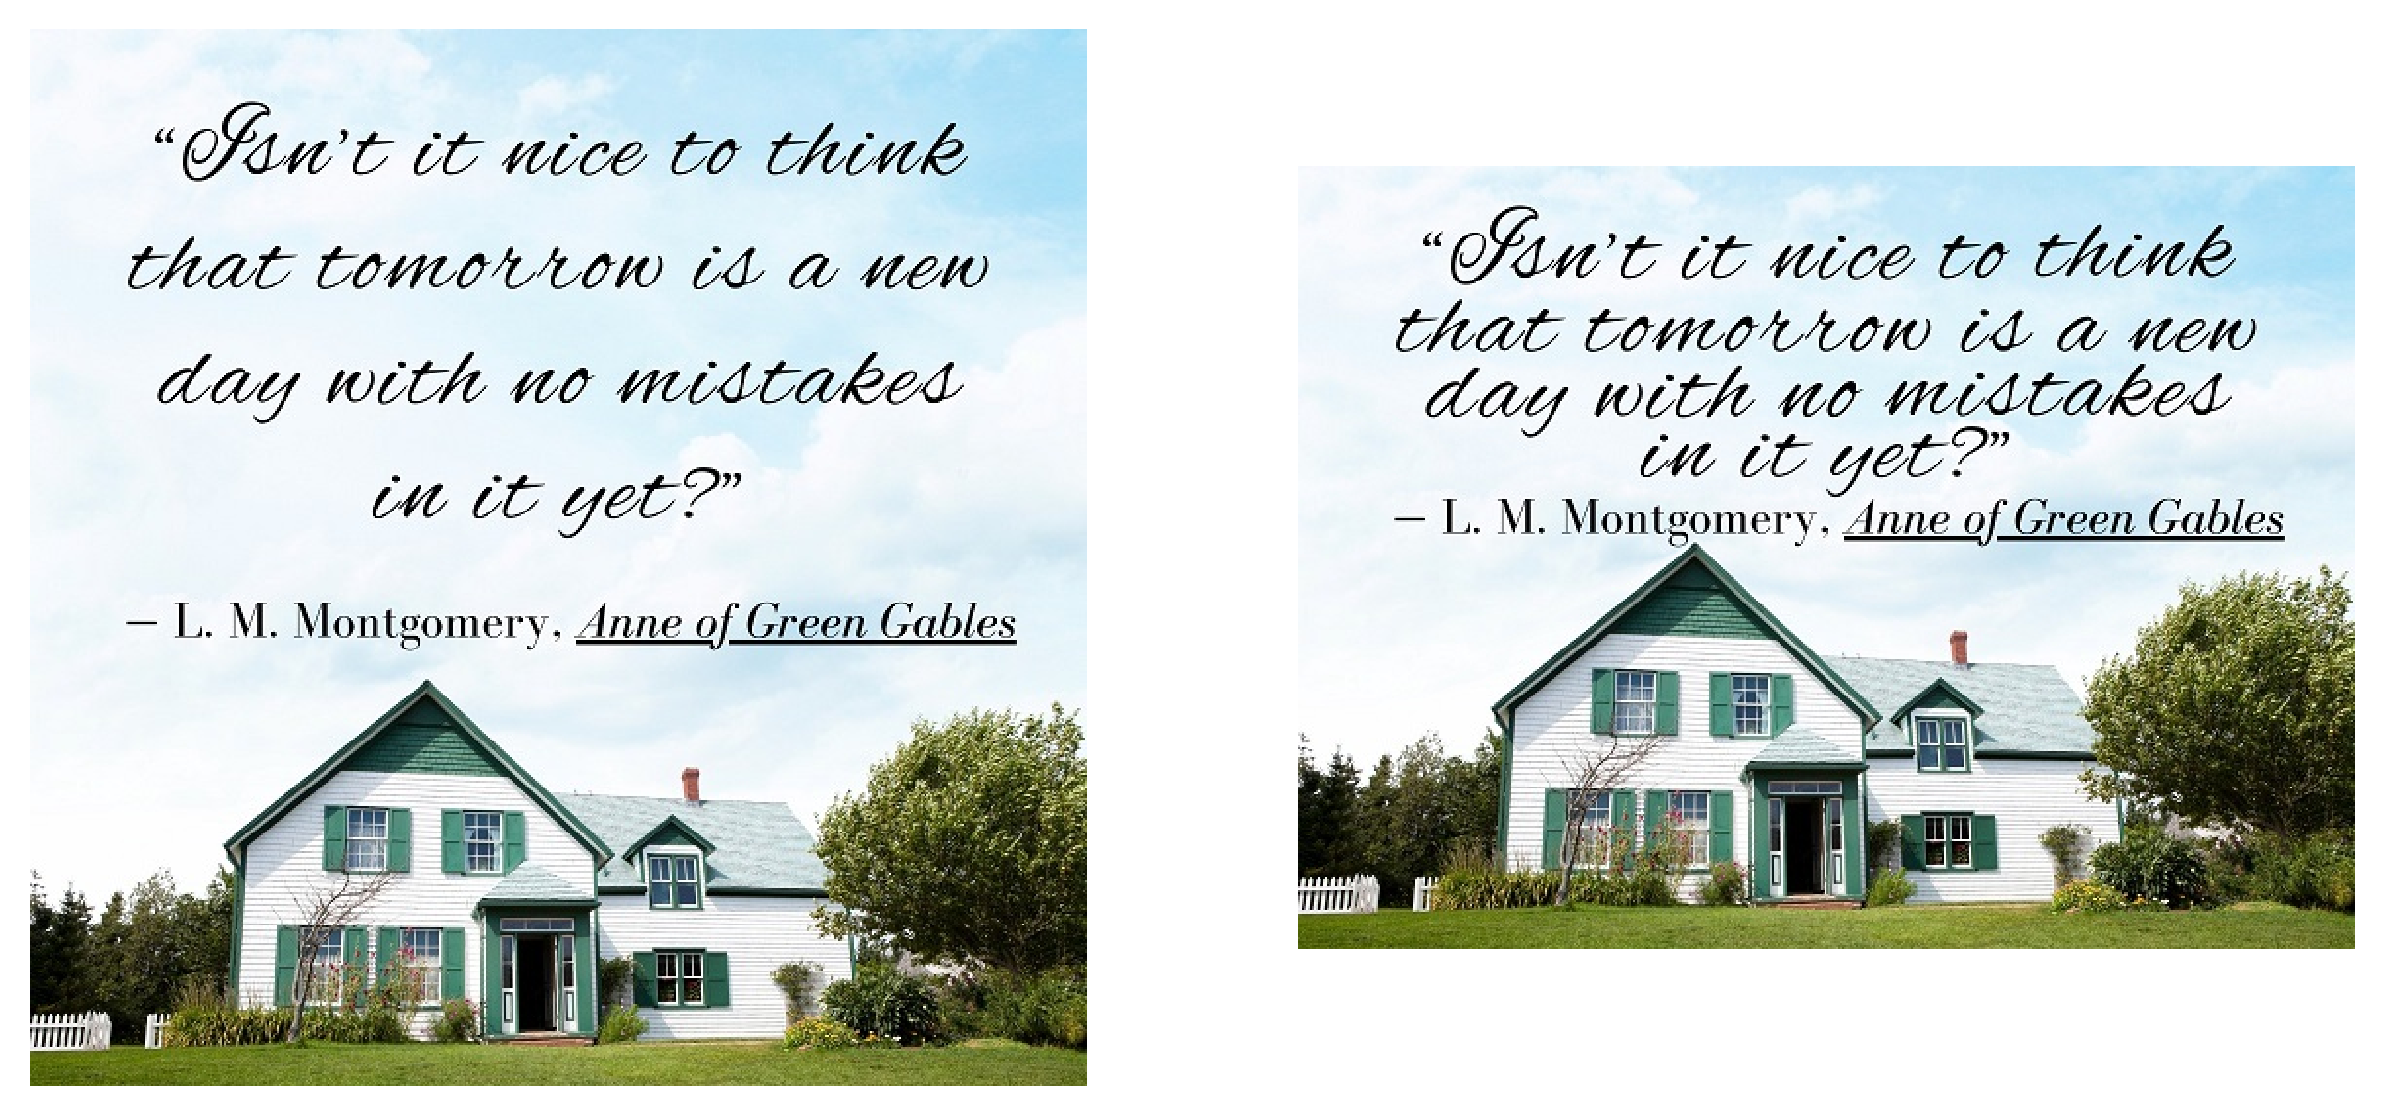

In [8]:
if not interactive:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.axis("off")
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(out.astype(np.int16))


Make the image smaller: 324x324 -> 240x240

Show the optimum seam as RED


In [22]:
in_filename = "img/thanks.jpg"
img = imread(in_filename)

out = crop_r(img, 84)
out = crop_c(out, 84)

# The first vertical seam
M, backtrack = minimum_seam(img)
seam_indices = find_optimal_seam(M, backtrack)
im_vs = img.copy()
# Set the pixels corresponding to the seam indices to red
for i, j in seam_indices:
    im_vs[i, j] = (255, 0, 0)  # Set RGB values to red

# The first horizontal seam
img = np.rot90(img, 1, (0, 1))
M, backtrack = minimum_seam(img)
seam_indices = find_optimal_seam(M, backtrack)
im_hs = img.copy()
# Set the pixels corresponding to the seam indices to red
for i, j in seam_indices:
    im_hs[i, j] = (255, 0, 0)  # Set RGB values to red

img = np.rot90(img, 3, (0, 1))
im_hs = np.rot90(im_hs, 3, (0, 1))

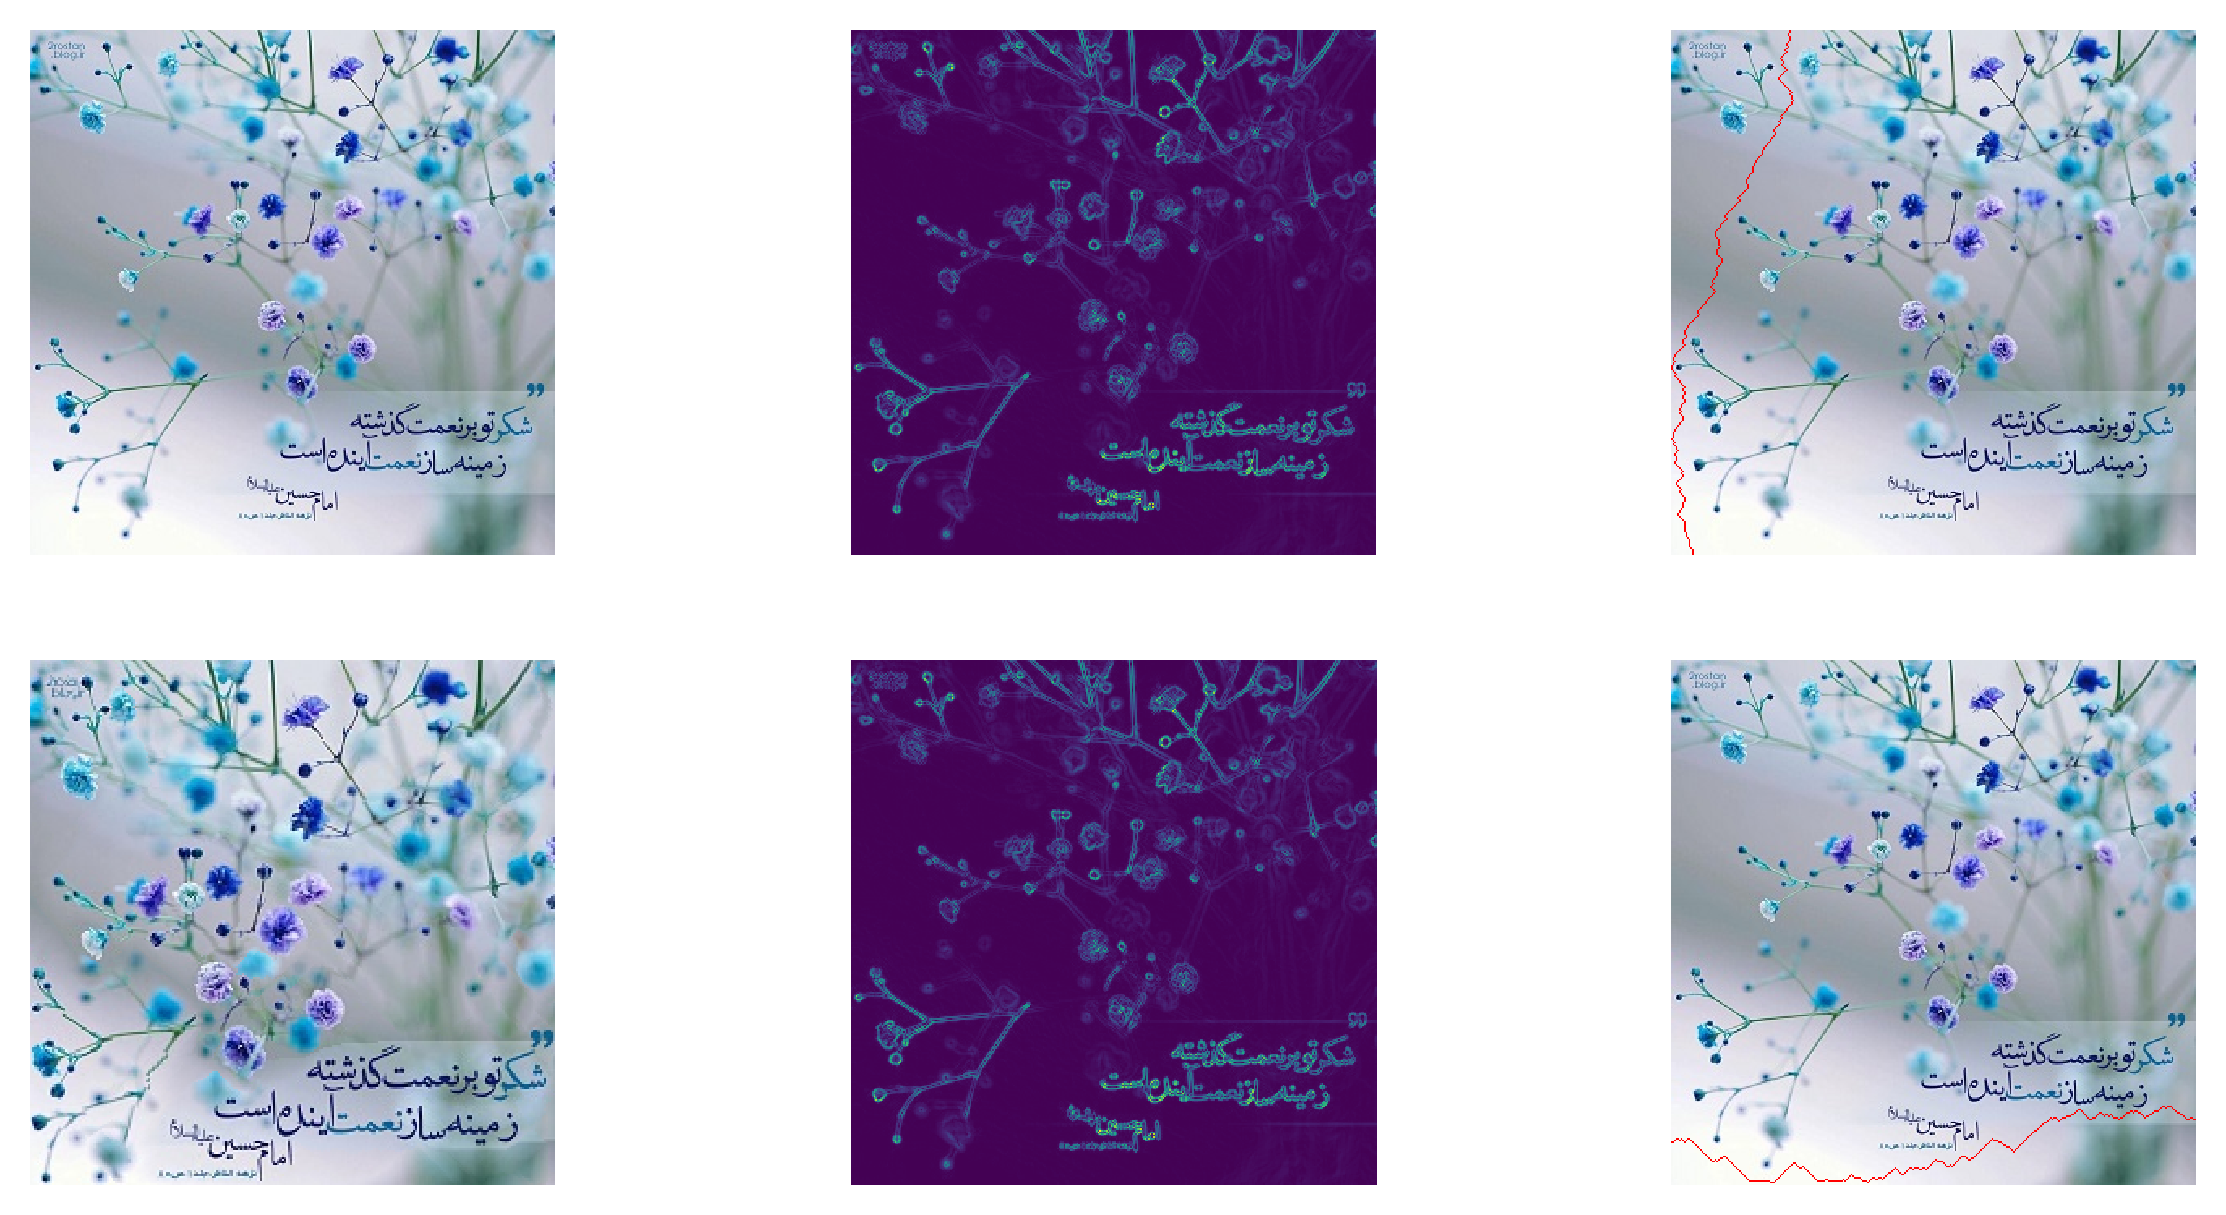

In [23]:
if not interactive:
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 3, 1)
    plt.axis("off")
    plt.imshow(img)

    plt.subplot(2, 3, 2)
    plt.axis("off")
    plt.imshow(calc_energy(img))

    plt.subplot(2, 3, 3)
    plt.axis("off")
    plt.imshow(im_vs)

    plt.subplot(2, 3, 4)
    plt.axis("off")
    plt.imshow(out)

    plt.subplot(2, 3, 5)
    plt.axis("off")
    plt.imshow(calc_energy(img))

    plt.subplot(2, 3, 6)
    plt.axis("off")
    plt.imshow(im_hs)

## Viterbi Algorithm

Let's visit the forward formula in the context of the Viterbi algorithm for Hidden Markov Models (HMMs).

1. **Background**:
   - The Viterbi algorithm is used to find the most likely sequence of hidden states (states of an HMM) given a sequence of observations (emissions).
   - In an HMM, we have:
     - Hidden states: $S = \{1, 2, \ldots, N\}$ (where $N$ is the total number of states).
     - Observations: $O = \{o_1, o_2, \ldots, o_T\}$ (where $T$ is the length of the observation sequence).

2. **Forward Algorithm**:
   - The forward algorithm computes the probability of observing the partial sequence $o_1, o_2, \ldots, o_t$ up to time $t$ and being in state $j$ at time $t$. We denote this as $\alpha_t(j)$.
   - The formula for $\alpha_{t+1}(j)$ is given by:

     $$ \alpha_{t+1}(j) = \left(\sum_{i=1}^N \alpha_t(i) \cdot a_{ij}\right) \cdot b_j(o_{t+1}) $$

     where:
     - $\alpha_t(i)$ represents the probability of being in state $i$ at time $t$.
     - $a_{ij}$ is the transition probability from state $i$ to state $j$.
     - $b_j(o_{t+1})$ is the emission probability of observing $o_{t+1}$ given that we are in state $j$.

3. **Initialization**:
   - To start the forward algorithm, we set $\alpha_0(j)$ for all states $j$ based on the initial state probabilities ($\pi_j$).

4. **Recursion**:
   - We compute $\alpha_{t+1}(j)$ for each time step $t$ by updating it based on the previous $\alpha_t(i)$ values and the transition and emission probabilities.

5. **Termination**:
   - The final probability of the entire observation sequence is given by $P(O|\lambda) = \sum_{i=1}^N \alpha_T(i)$.

The forward algorithm recursively computes the probabilities of being in different states at each time step, considering both transitions and emissions. 

![HMM-Model-Viterbi-Example](img/HMM-Model-Viterbi-Example.png)

Let's compute $\alpha_1(1)$, which represents the probability of starting in state 1 and observing $o_1$; using the given formula ($j=1, t=0, t+1=1$):

$$ \alpha_{1}(1) = \left(\sum_{i=1}^2 \alpha_t(i) a_{i1}\right) b_1(o_{1}) $$

$\alpha_1(1) = \alpha_0(1) a_{11} b_1(o_1) + \alpha_0(2) a_{21} b_1(o_1) = \pi_1 a_{11} b_1(o_1) + \pi_2 a_{21} b_1(o_1)$, 
where $\pi_j$ is the initial state probability for state j and $b_j(o_{t+1})$ is the emission probability for observation $o_{t+1}$ given that we are in state $j$.

![HMM-Model-Viterbi-Example-Solution](img/HMM-Model-Viterbi-Example-Sol.png)

In [13]:
from hidden_markov import hmm

Defining the HMM model of page 37 of [Dr. Veisi's slides](https://www.dropbox.com/scl/fi/9ez77b75eyw1al55k086s/StatNLP-Lecture6-HMM.pdf?rlkey=2vd1mfqwsrbu3ru4il6hta4m7&dl=0)

In [14]:
# Define the Model
states = ("S1", "S2")
observations = ("A", "B")
start_prob_matrix = np.matrix([1, 0])
transition_matrix = np.matrix([[0.6, 0.4], [0, 1]])
emission_matrix = np.matrix([[0.8, 0.2], [0.3, 0.7]])

In [15]:
hmm_model = hmm(
    states, observations, start_prob_matrix, transition_matrix, emission_matrix
)

In [16]:
# The observations that we observe and feed to the model
obs1 = ("A", "A", "B")
hmm_model.forward_algo(obs1)

0.22080000000000002

In [17]:
hmm_model.viterbi(obs1)

['S1', 'S1', 'S2']

Define another model with dictionaries [GfG](https://www.geeksforgeeks.org/viterbi-algorithm-for-hidden-markov-models-hmms/)

In [18]:
# Define the Model
states = ("Rainy", "Sunny")
observations = ("walk", "shop", "clean")
start_probability = {"Rainy": 0.6, "Sunny": 0.4}
transition_probability = {
    "Rainy": {"Rainy": 0.7, "Sunny": 0.3},
    "Sunny": {"Rainy": 0.4, "Sunny": 0.6},
}
emission_probability = {
    "Rainy": {"walk": 0.1, "shop": 0.4, "clean": 0.5},
    "Sunny": {"walk": 0.6, "shop": 0.3, "clean": 0.1},
}

Converting dictionary to matrix

In [19]:
# Converting dictionary to matrix
n = len(states)

start_prob_matrix = np.matrix(list(start_probability.values()))
# print(start_prob_matrix)

transition_matrix = np.zeros((n, n))
for i, row_state in enumerate(states):
    for j, col_state in enumerate(states):
        transition_matrix[i, j] = transition_probability[row_state][col_state]
transition_matrix = np.matrix(transition_matrix)
# print(transition_matrix)

rows = len(emission_probability)
cols = len(emission_probability["Rainy"])
emission_matrix = np.zeros((rows, cols))

for i, state in enumerate(emission_probability):
    for j, activity in enumerate(emission_probability[state]):
        emission_matrix[i][j] = emission_probability[state][activity]
emission_matrix = np.matrix(emission_matrix)
# print(emission_matrix)

In [20]:
hmm_model = hmm(
    states, observations, start_prob_matrix, transition_matrix, emission_matrix
)

In [21]:
# The observations that we observe and feed to the model
obs1 = ("walk",  "shop", "clean")
hmm_model.forward_algo(obs1)

0.033612

In [22]:
hmm_model.viterbi(obs1)

['Sunny', 'Rainy', 'Rainy']

---

**References:**

1. [Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/A.pdf), by Dan Jurafsky and James H. Martin. Stanford University, 2023.
2. Shai Avidan and Ariel Shamir. "Seam Carving for Content-Aware Image Resizing." 
   - [Paper](https://perso.crans.org/frenoy/matlab2012/seamcarving.pdf) 
   - [Github, Python](https://github.com/vivianhylee/seam-carving)
   - [GitHub (C++)](https://github.com/loc-trinh/seamCarving)
3. [Implementing Seam Carving with Python](https://karthikkaranth.me/blog/implementing-seam-carving-with-python/), by Karthik Karanth
4. [Intro to the Seam Carving Algorithm](https://ben-tanen.com/projects/2020/10/08/seam-carving-pt1.html), by Ben Tanen
5. [Intro to the Viterbi Algorithm](https://frazierbutler.medium.com/intro-to-the-viterbi-algorithm-8f41c3f43cf3), by Paul Butler

